# + Requirements

1. List of strategies on AllocateSmartly
2. CSVs of each strategy
3. Update every month (at rebalance date)
4. Import data table for each strategy on PortfolioVisualizer as "shares" and benchmarks
5. Update strategy (strategy of several strategies)
6.

In [1]:
import os
from selenium import webdriver
import pandas as pd
import datetime, time, csv
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

REMEMBER

export ASNAME='scubamut@gmail.com'

export ASPASSWD=''

export PVNAME='scubamut@gmail.com'

export PVPASSWD=''

In [2]:
# DON'T UPLOAD PASSWORDS TO GITHUB

os.environ.update({'PVNAME':'scubamut@gmail.com'})
os.environ.update({'PVPASSWD':'9D@3G!#qH5ZK*k^X*L%x'})
os.environ.update({'ASNAME':'scubamut@gmail.com'})
os.environ.update({'ASPASSWD':'LoZu#WJdjUvu3uFzLOst'})

# Allocate Smartly

In [5]:
# prepare Data folders

import shutil

try:
    shutil.rmtree(b'/home/scubamut/MEGAsync/WORK_IN_PROGRESS/pvautomate/Data')
except:
    pass

os.makedirs(b'/home/scubamut/MEGAsync/WORK_IN_PROGRESS/pvautomate/Data')
os.makedirs(b'/home/scubamut/MEGAsync/WORK_IN_PROGRESS/pvautomate/Data/strategy_returns')
os.makedirs(b'/home/scubamut/MEGAsync/WORK_IN_PROGRESS/pvautomate/Data/benchmark_returns')

## Login to allocatesmartly.com and generate CSV files for the Strategies


In [6]:
data_path = '/home/scubamut/MEGAsync/WORK_IN_PROGRESS/pvautomate/Data/'

# browser = webdriver.Chrome("/usr/lib/chromium-browser/chromedriver")
browser = webdriver.Chrome("/usr/local/share/chromedriver")
browser.get('https://allocatesmartly.com/login')
browser.set_window_position(1,1)
browser.maximize_window()
time.sleep(5)
user = browser.find_element_by_id('user_login')
user.send_keys(os.environ.get('ASNAME'))
password = browser.find_element_by_id('user_pass')
password.send_keys(os.environ.get('ASPASSWD'))
time.sleep(5)
login = browser.find_element_by_id('wp-submit')
login.click()

browser.get('https://allocatesmartly.com/members/strategies/')

strategies = pd.read_html(browser.page_source, header=0)[0]
strategies = strategies.filter(items=[c for c in strategies.columns][1:-2])
# remove Strategy 'Trading ...'
strategies.Strategy = strategies.Strategy.apply(lambda x: x[:x.find('Trading')])
strategies

,Strategy,AnnualReturn (20Y),SharpeRatio (20Y)
0,Kipnis' Defensive Adaptive Asset Allocation,10.7%,1.12
1,Protective Asset Allocation,10.0%,1.08
2,Adaptive Asset Allocation,11.7%,1.06
3,Allocate Smartly's Meta Strategy,8.9%,1.04
4,Varadi's Percentile Channels,7.6%,1.03
5,Protective Asset Allocation - CPR,9.4%,1.02
6,Vigilant Asset Allocation - Aggressive,13.7%,1.01
7,Keuning's Generalized Protective Momentum,9.8%,1.00
8,Accelerating Dual Momentum,15.0%,0.97
9,US Risk Parity Trend Following,6.5%,0.93


In [7]:
# for each strategy, get monthly table and generate CSV files 

for s in strategies.Strategy:
    print(s)
    browser.find_elements_by_link_text(s)[0].click()
    browser.find_element_by_id('sx-periodic-table')
    table = pd.read_html(browser.page_source, header=1)[2]
    table.columns = ['Year','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Total']
    # need to change 60/40 to 60_40 for 
    table.to_csv(data_path + 'strategy_returns/' + s.replace('/','_')+'.csv')
    browser.execute_script("window.history.go(-1)")
    time.sleep(2)
    
browser.close()

Kipnis' Defensive Adaptive Asset Allocation
Protective Asset Allocation
Adaptive Asset Allocation
Allocate Smartly's Meta Strategy
Varadi's Percentile Channels
Protective Asset Allocation - CPR
Vigilant Asset Allocation - Aggressive
Keuning's Generalized Protective Momentum
Accelerating Dual Momentum
US Risk Parity Trend Following
Defensive Asset Allocation
US Max Diversification
Stoken's Active Combined Asset (ACA)
Stoken's Active Combined Asset (ACA) - Monthly
Livingston's Mama Bear Portfolio
Varadi's Minimum Correlation Portfolio
Classical Asset Allocation - Defensive
Robust Asset Allocation - Balanced
Efficiente Index
Elastic Asset Allocation - Defensive
Faber's Trinity Portfolio Lite
US Equal Risk Contribution
Flexible Asset Allocation
Elastic Asset Allocation - Offensive
Faber's Global Tactical Asset Alloc. - Agg. 6
Composite Dual Momentum
US Min Correlation
Global Risk Parity Trend Following
Faber's Global Tactical Asset Alloc. 5 (GTAA 5)
Dalio's All-Weather Portfolio
Vigilant A

In [8]:
# 
strats = strategies.copy()
strats.to_csv(data_path + 'strats.csv')

## Generate symbols (benchmark names) for use by Portfolio Visualizer

In [9]:
data_path = '/home/scubamut/MEGAsync/WORK_IN_PROGRESS/pvautomate/Data/'
strategies = pd.read_csv(data_path + 'strats.csv')

In [11]:
#  new Stratnames column and remove brackets
strategies['Stratnames'] = pd.Series(strategies.Strategy).str.replace(r"\(.*\)","")
# rename 60/40 Benchmark to B6040 Benchmark
strategies['Stratnames'] = strategies.Stratnames.str.replace('40', 'B6040')
# remove developer from name
strategies['Stratnames'] = strategies.Stratnames.str.replace("/('\w+)|(\w+'\w+)|(\w+')|(\w+)/", "")
# new column for Developers
strategies['Developer'] = strategies.Strategy.str.extract("/('\w+)|(\w+'\w+)|(\w+')|(\w+)/", expand=True)[1]
# create unique name >= 6 characters for Portfolio Visualizer Bencmarks
strategies['Name'] = [''.join([c for c in s if c.isupper()]) for s in strategies.Stratnames]
strategies['Numbers'] = strategies.Stratnames.str.extract('(\d+)', expand=True).fillna('')
strategies['Symbol'] = strategies['Name'] + strategies['Numbers']
# # append 0s so that Share Name is at least 6 characters
strategies['Symbol'] = [s+'00000'[:6-len(s)]for s in strategies.Symbol]
strategies['Symbol'] = strategies['Symbol'].str.replace('4000', 'B6040')
strategies = strategies.filter(items=['Strategy', 'Stratnames', 'Symbol', 'AnnualReturn (20Y)', 'SharpeRatio (20Y)'])
strategies['Strategy'] = strategies['Strategy'].str.replace('/','_')
strategies

,Strategy,Stratnames,Symbol,AnnualReturn (20Y),SharpeRatio (20Y)
0,Kipnis' Defensive Adaptive Asset Allocation,Defensive Adaptive Asset Allocation,DAAA00,10.7%,1.12
1,Protective Asset Allocation,Protective Asset Allocation,PAA000,10.0%,1.08
2,Adaptive Asset Allocation,Adaptive Asset Allocation,AAA000,11.7%,1.06
3,Allocate Smartly's Meta Strategy,Allocate Meta Strategy,AMS000,8.9%,1.04
4,Varadi's Percentile Channels,Percentile Channels,PC0000,7.6%,1.03
5,Protective Asset Allocation - CPR,Protective Asset Allocation - CPR,PAACPR,9.4%,1.02
6,Vigilant Asset Allocation - Aggressive,Vigilant Asset Allocation - Aggressive,VAAA00,13.7%,1.01
7,Keuning's Generalized Protective Momentum,Generalized Protective Momentum,GPM000,9.8%,1.00
8,Accelerating Dual Momentum,Accelerating Dual Momentum,ADM000,15.0%,0.97
9,US Risk Parity Trend Following,US Risk Parity Trend Following,USRPTF,6.5%,0.93


In [12]:
# verfy that all Securities are unique

len(strategies) == len(strategies.Symbol.unique())

True

In [13]:
strategies.to_csv('/home/scubamut/MEGAsync/WORK_IN_PROGRESS/pvautomate/Data/ASstrategies.csv', index=None)
strategies[:5]

,Strategy,Stratnames,Symbol,AnnualReturn (20Y),SharpeRatio (20Y)
0,Kipnis' Defensive Adaptive Asset Allocation,Defensive Adaptive Asset Allocation,DAAA00,10.7%,1.12
1,Protective Asset Allocation,Protective Asset Allocation,PAA000,10.0%,1.08
2,Adaptive Asset Allocation,Adaptive Asset Allocation,AAA000,11.7%,1.06
3,Allocate Smartly's Meta Strategy,Allocate Meta Strategy,AMS000,8.9%,1.04
4,Varadi's Percentile Channels,Percentile Channels,PC0000,7.6%,1.03


In [14]:
strategies

,Strategy,Stratnames,Symbol,AnnualReturn (20Y),SharpeRatio (20Y)
0,Kipnis' Defensive Adaptive Asset Allocation,Defensive Adaptive Asset Allocation,DAAA00,10.7%,1.12
1,Protective Asset Allocation,Protective Asset Allocation,PAA000,10.0%,1.08
2,Adaptive Asset Allocation,Adaptive Asset Allocation,AAA000,11.7%,1.06
3,Allocate Smartly's Meta Strategy,Allocate Meta Strategy,AMS000,8.9%,1.04
4,Varadi's Percentile Channels,Percentile Channels,PC0000,7.6%,1.03
5,Protective Asset Allocation - CPR,Protective Asset Allocation - CPR,PAACPR,9.4%,1.02
6,Vigilant Asset Allocation - Aggressive,Vigilant Asset Allocation - Aggressive,VAAA00,13.7%,1.01
7,Keuning's Generalized Protective Momentum,Generalized Protective Momentum,GPM000,9.8%,1.00
8,Accelerating Dual Momentum,Accelerating Dual Momentum,ADM000,15.0%,0.97
9,US Risk Parity Trend Following,US Risk Parity Trend Following,USRPTF,6.5%,0.93


## Generate Benchmark Returns for use by Portfolio Visualizer 

In [15]:
def update_strategy_data(data_path, strategy, symbol):
    """
    For each strategy, save latest data table from website, 
    generate csv data to save benchmark with format suitable for
    PortfolioVisualizer
    
    - data_path : windows folder name for data
    - symbol : strategy Symbol 
    - strategy : strategy Name
    
    """
    df = pd.read_csv(data_path + 'strategy_returns/' + strategy + '.csv',index_col=[0] )

    df1 = pd.DataFrame(columns=['Period','Return'])
    df1 = df1.append({'Period': 'Period', 'Return': 'Return'}, ignore_index=True)
    for row in range(0,len(df)):
        for column in range(1,13):
            year, month, value = df.iloc[row,0], column, df.iloc[row, column]
#             period = (datetime.date (year, month, 1) - datetime.timedelta (days = 1)).strftime('%#m/%#d/%Y')
            next_month = datetime.date (year, month, 1).replace(day=28) + datetime.timedelta(days=4)  # this will never fail
            period = next_month - datetime.timedelta(days=next_month.day)        
            if not np.isreal(value):
                newline = str(period) + u',' + value
                df1 = df1.append({'Period': period, 'Return': value}, ignore_index=True)

    df1.to_csv(data_path + 'benchmark_returns/' + symbol.replace('/','_')+'.csv', index=False, header=False, quoting=csv.QUOTE_NONNUMERIC) 

In [16]:
data_path = '/home/scubamut/MEGAsync/WORK_IN_PROGRESS/pvautomate/Data/'

for n in range(len(strategies)):
# for n in [1]:
    symbol = strategies.Symbol[n]
    strategy = strategies.Strategy[n]
    print((symbol, strategy))
    update_strategy_data(data_path, strategy, symbol)
    
#browser.close()

('DAAA00', "Kipnis' Defensive Adaptive Asset Allocation")
('PAA000', 'Protective Asset Allocation')
('AAA000', 'Adaptive Asset Allocation')
('AMS000', "Allocate Smartly's Meta Strategy")
('PC0000', "Varadi's Percentile Channels")
('PAACPR', 'Protective Asset Allocation - CPR')
('VAAA00', 'Vigilant Asset Allocation - Aggressive')
('GPM000', "Keuning's Generalized Protective Momentum")
('ADM000', 'Accelerating Dual Momentum')
('USRPTF', 'US Risk Parity Trend Following')
('DAA000', 'Defensive Asset Allocation')
('USMD00', 'US Max Diversification')
('ACA000', "Stoken's Active Combined Asset (ACA)")
('ACAM00', "Stoken's Active Combined Asset (ACA) - Monthly")
('MBP000', "Livingston's Mama Bear Portfolio")
('MCP000', "Varadi's Minimum Correlation Portfolio")
('CAAD00', 'Classical Asset Allocation - Defensive')
('RAAB00', 'Robust Asset Allocation - Balanced')
('EI0000', 'Efficiente Index')
('EAAD00', 'Elastic Asset Allocation - Defensive')
('TPL000', "Faber's Trinity Portfolio Lite")
('USERC0

# Portfolio Visualizer

## Login to PortfolioVisualizer

In [17]:
from selenium import webdriver
import time

# browser = webdriver.Chrome("/usr/lib/chromium-browser/chromedriver")
browser = webdriver.Chrome("/usr/local/share/chromedriver")
# browser = webdriver.Firefox()
browser.set_window_position(1,1)
# browser.set_window_size(1038, 875)
browser.maximize_window()
browser.get('https://www.portfoliovisualizer.com/login')
time.sleep(2)
user = browser.find_element_by_id('username')
user.send_keys(os.environ.get('PVNAME'))
password = browser.find_element_by_id('password')
password.send_keys(os.environ.get('PVPASSWD'))
time.sleep(2)
login = browser.find_element_by_id('submitButton')
login.click()

## Navigate to Import Benchmarks

In [18]:
len(strategies)

49

In [19]:
strategies[-3:]

,Strategy,Stratnames,Symbol,AnnualReturn (20Y),SharpeRatio (20Y)
46,60_40 Benchmark,60_B6040 Benchmark,BB6000,6.2%,0.54
47,Faber's Ivy Portfolio,Ivy Portfolio,IP0000,7.0%,0.49
48,Faber's Sector Relative Strength (Sector RS),Sector Relative Strength,SRS000,6.4%,0.43


In [20]:
data_path = '/home/scubamut/MEGAsync/WORK_IN_PROGRESS/pvautomate/Data/benchmark_returns/'

# browser.get('https://www.portfoliovisualizer.com/preferences#import')
browser.get('https://www.portfoliovisualizer.com/manage-benchmarks#import')

In [39]:
#########################################################################
# IMPORTANT: ONLY 50 BENCHMARKS ALLOWED

# DELETE 5 STRATEGIES

# 16,10,27,24

In [40]:
strategies[:3]

,Strategy,Stratnames,Symbol,AnnualReturn (20Y),SharpeRatio (20Y)
0,Kipnis' Defensive Adaptive Asset Allocation,Defensive Adaptive Asset Allocation,DAAA00,10.7%,1.11
1,Protective Asset Allocation,Protective Asset Allocation,PAA000,10.0%,1.07
2,Adaptive Asset Allocation,Adaptive Asset Allocation,AAA000,11.7%,1.06


In [21]:
for n in range(len(strategies)):
    if n in [10,16,27,24]:
        print('OUT : ',n,strategies.Strategy[n])
    else: 
        print(n,strategies.Strategy[n])

0 Kipnis' Defensive Adaptive Asset Allocation
1 Protective Asset Allocation
2 Adaptive Asset Allocation
3 Allocate Smartly's Meta Strategy
4 Varadi's Percentile Channels
5 Protective Asset Allocation - CPR
6 Vigilant Asset Allocation - Aggressive
7 Keuning's Generalized Protective Momentum
8 Accelerating Dual Momentum
9 US Risk Parity Trend Following
OUT :  10 Defensive Asset Allocation
11 US Max Diversification
12 Stoken's Active Combined Asset (ACA)
13 Stoken's Active Combined Asset (ACA) - Monthly
14 Livingston's Mama Bear Portfolio
15 Varadi's Minimum Correlation Portfolio
OUT :  16 Classical Asset Allocation - Defensive
17 Robust Asset Allocation - Balanced
18 Efficiente Index
19 Elastic Asset Allocation - Defensive
20 Faber's Trinity Portfolio Lite
21 US Equal Risk Contribution
22 Flexible Asset Allocation
23 Elastic Asset Allocation - Offensive
OUT :  24 Faber's Global Tactical Asset Alloc. - Agg. 6
25 Composite Dual Momentum
26 US Min Correlation
OUT :  27 Global Risk Parity Tr

In [22]:
for n in range(len(strategies)):
    # for n in [1]:
    if n in [10,16,27,24]:
        print('OUT : ',n,strategies.Strategy[n])
    else: 
        print(n,strategies.Strategy[n])

        symbol = strategies.Symbol[n]
        strategy = strategies.Strategy[n]

        browser.maximize_window()

        # Series Name
        browser.find_element_by_id("benchmarkName").clear()
        browser.find_element_by_id("benchmarkName").send_keys(strategy)

        # Upload Data File
        browser.find_element_by_id("upload").clear()
        browser.find_element_by_id("upload").send_keys(data_path + symbol +'.csv')

        # Series (Type)
        browser.find_element_by_id('seriesType_chosen').click()

        # choose SeriesType : li[1|2|3|4] eg li[1] gives Monthly Returns
        browser.find_element_by_xpath('//*[@id="seriesType_chosen"]/div/ul/li[1]').click()    

        # Percentage Values (2=Yes)
        browser.find_element_by_id('percentageValues_chosen').click()
        browser.find_element_by_xpath('//*[@id="percentageValues_chosen"]/div/ul/li[2]').click()

        # Assigned Ticker
        browser.find_element_by_id("benchmarkSymbol").clear()
        browser.find_element_by_id("benchmarkSymbol").send_keys(symbol)
        browser.find_element_by_id('benchmarkAssetClass_chosen').click()

        # NOTE: there must be 10 years of monthly data to assign as an Asset Class (2=Yes)
        # But don't need this for creating a benckmark

        # Asset Class (2=Yes)
        browser.find_element_by_css_selector('#benchmarkAssetClass_chosen > div > ul > li:nth-child(2)').click()

        # Import Data Series
        browser.implicitly_wait(90)
        browser.find_element_by_id("importBenchmarkButton").click()

        print(browser.find_element_by_class_name("alert").text)

        browser.execute_script("window.history.go(-1)")
        time.sleep(2)
    
browser.close()    

0 Kipnis' Defensive Adaptive Asset Allocation
Benchmark series 'Kipnis' Defensive Adaptive Asset Allocation' imported.
1 Protective Asset Allocation
Benchmark series 'Protective Asset Allocation' imported.
2 Adaptive Asset Allocation
Benchmark series 'Adaptive Asset Allocation' imported.
3 Allocate Smartly's Meta Strategy
Benchmark series 'Allocate Smartly's Meta Strategy' imported.
4 Varadi's Percentile Channels
Benchmark series 'Varadi's Percentile Channels' imported.
5 Protective Asset Allocation - CPR
Benchmark series 'Protective Asset Allocation - CPR' imported.
6 Vigilant Asset Allocation - Aggressive
Benchmark series 'Vigilant Asset Allocation - Aggressive' imported.
7 Keuning's Generalized Protective Momentum
Benchmark series 'Keuning's Generalized Protective Momentum' imported.
8 Accelerating Dual Momentum
Benchmark series 'Accelerating Dual Momentum' imported.
9 US Risk Parity Trend Following
Benchmark series 'US Risk Parity Trend Following' imported.
OUT :  10 Defensive Asse

In [ ]:
# REMEMBER THAT THE LAST MONTH MAY BE INCOMPLETE!!

# [WIP] HOW TO CREATE OPTIMISED PORTFOLIOS OF N STRATEGIES?

In [48]:
strategies = pd.read_csv('/home/scubamut/MEGAsync/WORK_IN_PROGRESS/pvautomate/Data/ASstrategies.csv')
strategies[:3]

,Strategy,Stratnames,Symbol,AnnualReturn (20Y),SharpeRatio (20Y)
0,Kipnis' Defensive Adaptive Asset Allocation,Defensive Adaptive Asset Allocation,DAAA00,10.7%,1.11
1,Protective Asset Allocation,Protective Asset Allocation,PAA000,10.0%,1.07
2,Adaptive Asset Allocation,Adaptive Asset Allocation,AAA000,11.7%,1.06


In [49]:
data_path = '/home/scubamut/MEGAsync/WORK_IN_PROGRESS/pvautomate/Data/benchmark_returns/'

In [50]:
df = pd.DataFrame(columns=list(strategies.Symbol), index=pd.read_csv(data_path + 'BB6040.csv').Period)
df[:2]

,DAAA00,PAA000,AAA000,AMS000,PAACPR,VAAA00,PC0000,GPM000,ADM000,DAA000,...,RAAA00,USMS00,TBS000,PGTT00,TDM000,PSS000,TWM000,BB6040,IP0000,SRS000
Period,,,,,,,,,,,,,,,,,,,,,
1970-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# dataframe of all returns
for n in range(len(strategies)):
    print (n, strategies.Strategy[n], strategies.Symbol[n])
    df[strategies.Symbol[n]] = pd.read_csv(data_path + strategies.Symbol[n] + '.csv',index_col="Period")

0 Kipnis' Defensive Adaptive Asset Allocation DAAA00
1 Protective Asset Allocation PAA000
2 Adaptive Asset Allocation AAA000
3 Allocate Smartly's Meta Strategy AMS000
4 Protective Asset Allocation - CPR PAACPR
5 Vigilant Asset Allocation - Aggressive VAAA00
6 Varadi's Percentile Channels PC0000
7 Keuning's Generalized Protective Momentum GPM000
8 Accelerating Dual Momentum ADM000
9 Defensive Asset Allocation DAA000
10 US Risk Parity Trend Following USRPTF
11 US Max Diversification USMD00
12 Stoken's Active Combined Asset (ACA) ACA000
13 Stoken's Active Combined Asset (ACA) - Monthly ACAM00
14 Classical Asset Allocation - Defensive CAAD00
15 Livingston's Mama Bear Portfolio MBP000
16 Robust Asset Allocation - Balanced RAAB00
17 Elastic Asset Allocation - Defensive EAAD00
18 Varadi's Minimum Correlation Portfolio MCP000
19 Efficiente Index EI0000
20 Elastic Asset Allocation - Offensive EAAO00
21 Faber's Trinity Portfolio Lite TPL000
22 Flexible Asset Allocation FAA000
23 Faber's Global T

In [136]:
data = df.dropna()
data[:10]

,DAAA00,PAA000,AAA000,AMS000,PAACPR,VAAA00,PC0000,GPM000,ADM000,DAA000,...,RAAA00,USMS00,TBS000,PGTT00,TDM000,PSS000,TWM000,BB6040,IP0000,SRS000
Period,,,,,,,,,,,,,,,,,,,,,
1991-01-31,1.0%,1.0%,-1.1%,0.9%,1.0%,1.0%,0.1%,0.5%,4.3%,3.4%,...,0.5%,6.2%,0.6%,4.3%,1.0%,1.0%,-1.7%,3.0%,1.6%,0.9%
1991-02-28,0.9%,0.5%,0.6%,2.2%,0.5%,0.4%,1.8%,0.4%,7.1%,7.2%,...,2.4%,2.7%,0.3%,7.1%,7.1%,7.1%,2.3%,4.5%,3.9%,7.6%
1991-03-31,-2.9%,1.5%,0.2%,2.0%,1.5%,3.9%,1.9%,0.0%,2.4%,1.0%,...,0.1%,1.4%,0.1%,2.4%,2.4%,2.4%,1.3%,1.6%,1.4%,2.1%
1991-04-30,1.2%,0.7%,1.3%,0.7%,0.7%,1.2%,1.3%,0.8%,0.2%,1.0%,...,0.5%,1.0%,1.6%,0.2%,0.2%,0.2%,0.7%,0.5%,1.0%,-0.7%
1991-05-31,0.8%,2.2%,1.3%,3.8%,2.2%,7.8%,1.3%,1.7%,4.3%,4.1%,...,1.9%,1.2%,0.4%,4.3%,4.3%,4.3%,2.2%,2.8%,1.6%,3.8%
1991-06-30,-1.2%,-2.9%,-4.5%,-3.4%,-2.9%,-3.8%,-0.9%,-2.8%,-4.8%,-4.1%,...,-2.7%,-0.4%,0.4%,-4.6%,-4.6%,-4.8%,-2.8%,-3.0%,-3.7%,-5.2%
1991-07-31,0.9%,2.0%,1.1%,2.0%,2.0%,1.1%,1.5%,0.7%,0.2%,1.6%,...,2.2%,1.4%,1.4%,4.7%,4.7%,1.1%,3.0%,3.2%,3.4%,5.2%
1991-08-31,1.5%,2.7%,0.4%,2.2%,2.7%,1.9%,1.9%,0.4%,2.4%,2.8%,...,1.1%,2.3%,1.5%,2.4%,2.4%,2.2%,3.2%,2.7%,0.8%,2.9%
1991-09-30,2.7%,1.4%,3.0%,1.1%,1.4%,2.8%,1.1%,2.5%,-1.7%,0.0%,...,1.2%,1.9%,2.4%,-1.7%,-1.7%,3.4%,0.9%,0.2%,1.7%,-2.0%


In [137]:
data = (data.applymap(lambda x: x.rstrip('%'))).astype(float)
# data.cumsum()
data.astype(float)[:3]

,DAAA00,PAA000,AAA000,AMS000,PAACPR,VAAA00,PC0000,GPM000,ADM000,DAA000,...,RAAA00,USMS00,TBS000,PGTT00,TDM000,PSS000,TWM000,BB6040,IP0000,SRS000
Period,,,,,,,,,,,,,,,,,,,,,
1991-01-31,1.0,1.0,-1.1,0.9,1.0,1.0,0.1,0.5,4.3,3.4,...,0.5,6.2,0.6,4.3,1.0,1.0,-1.7,3.0,1.6,0.9
1991-02-28,0.9,0.5,0.6,2.2,0.5,0.4,1.8,0.4,7.1,7.2,...,2.4,2.7,0.3,7.1,7.1,7.1,2.3,4.5,3.9,7.6
1991-03-31,-2.9,1.5,0.2,2.0,1.5,3.9,1.9,0.0,2.4,1.0,...,0.1,1.4,0.1,2.4,2.4,2.4,1.3,1.6,1.4,2.1


In [138]:
# remove rows with all zeroes
data = data[(data.T != 0).any()]
data[-3:]

,DAAA00,PAA000,AAA000,AMS000,PAACPR,VAAA00,PC0000,GPM000,ADM000,DAA000,...,RAAA00,USMS00,TBS000,PGTT00,TDM000,PSS000,TWM000,BB6040,IP0000,SRS000
Period,,,,,,,,,,,,,,,,,,,,,
2019-03-31,0.8,2.5,2.9,2.1,2.5,2.7,2.9,2.6,1.8,2.0,...,0.9,2.6,1.9,1.8,1.8,5.4,1.9,2.1,1.8,2.7
2019-04-30,0.2,0.1,-1.0,1.4,0.1,4.1,0.8,-0.6,4.1,1.4,...,1.1,1.0,-0.8,4.1,4.1,4.1,0.5,2.2,1.5,2.2
2019-05-31,-6.0,0.0,-1.5,-2.4,0.0,-6.6,-1.6,2.9,-6.6,-6.0,...,-2.5,-1.0,3.0,-6.4,-6.4,-6.6,0.7,-2.6,-3.0,-5.1


In [139]:
data_path = '/home/scubamut/MEGAsync/WORK_IN_PROGRESS/pvautomate/Data/benchmark_returns/'
data.to_csv(data_path + 'data.csv')

In [121]:
returns = data.cumsum()
returns[-3:]

,DAAA00,PAA000,AAA000,AMS000,PAACPR,VAAA00,PC0000,GPM000,ADM000,DAA000,...,RAAA00,USMS00,TBS000,PGTT00,TDM000,PSS000,TWM000,BB6040,IP0000,SRS000
Period,,,,,,,,,,,,,,,,,,,,,
2019-03-31,322.2,295.1,317.5,279.6,279.9,401.2,229.3,287.6,443.2,330.1,...,235.5,257.1,194.7,331.4,328.8,344.2,272.0,249.2,232.2,279.2
2019-04-30,322.4,295.2,316.5,281.0,280.0,405.3,230.1,287.0,447.3,331.5,...,236.6,258.1,193.9,335.5,332.9,348.3,272.5,251.4,233.7,281.4
2019-05-31,316.4,295.2,315.0,278.6,280.0,398.7,228.5,289.9,440.7,325.5,...,234.1,257.1,196.9,329.1,326.5,341.7,273.2,248.8,230.7,276.3


In [140]:
d = data[['DAAA00','AAA000']]
d.corr()

,DAAA00,AAA000
DAAA00,1.000000,0.712544
AAA000,0.712544,1.000000


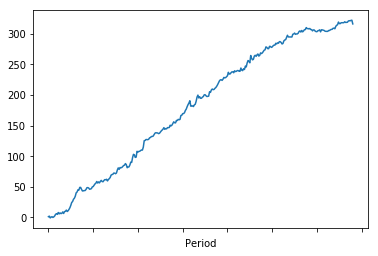

In [132]:
d.DAAA00.plot()

In [142]:
d = data.PAA000.describe()
d

count    341.000000
mean       0.865689
std        2.178537
min       -6.000000
25%       -0.400000
50%        0.900000
75%        2.200000
max        8.300000
Name: PAA000, dtype: float64

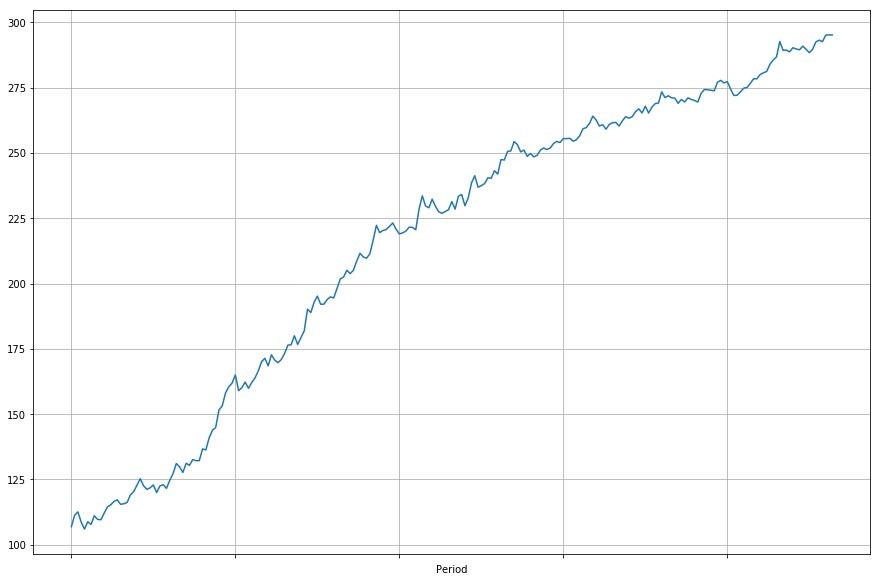

In [145]:
returns[returns.index>'1999-12-31'].PAA000.plot(figsize=(15,10),grid=True)

In [124]:
returns.corr(method='spearman', min_periods=1)

,DAAA00,PAA000,AAA000,AMS000,PAACPR,VAAA00,PC0000,GPM000,ADM000,DAA000,...,RAAA00,USMS00,TBS000,PGTT00,TDM000,PSS000,TWM000,BB6040,IP0000,SRS000
DAAA00,1.000000,0.998280,0.998071,0.999410,0.998851,0.996204,0.998318,0.998505,0.996276,0.997915,...,0.995689,0.997778,0.995965,0.993419,0.996672,0.993322,0.997665,0.987045,0.990626,0.995246
PAA000,0.998280,1.000000,0.998652,0.998573,0.999659,0.995422,0.998894,0.999382,0.996180,0.998005,...,0.995595,0.998819,0.997490,0.992794,0.996260,0.992491,0.996756,0.987785,0.990394,0.993046
AAA000,0.998071,0.998652,1.000000,0.998475,0.998544,0.995095,0.998718,0.998746,0.996270,0.998037,...,0.995828,0.998217,0.996997,0.992416,0.996183,0.991803,0.997074,0.988636,0.991890,0.993086
AMS000,0.999410,0.998573,0.998475,1.000000,0.999070,0.996337,0.998805,0.998637,0.996804,0.998444,...,0.996661,0.998198,0.996528,0.993881,0.997504,0.993592,0.998092,0.988102,0.991808,0.995475
PAACPR,0.998851,0.999659,0.998544,0.999070,1.000000,0.995675,0.998729,0.999315,0.996527,0.997944,...,0.995929,0.998668,0.997164,0.993296,0.996571,0.993236,0.997419,0.987620,0.990323,0.994192
VAAA00,0.996204,0.995422,0.995095,0.996337,0.995675,1.000000,0.995799,0.995677,0.993515,0.996619,...,0.993343,0.994519,0.992694,0.990806,0.993741,0.991087,0.994465,0.984002,0.988731,0.993988
PC0000,0.998318,0.998894,0.998718,0.998805,0.998729,0.995799,1.000000,0.998656,0.995723,0.998287,...,0.996508,0.998473,0.997089,0.993182,0.996677,0.992133,0.997611,0.988313,0.992298,0.993949
GPM000,0.998505,0.999382,0.998746,0.998637,0.999315,0.995677,0.998656,1.000000,0.995959,0.998121,...,0.995167,0.998591,0.997668,0.992433,0.995944,0.992435,0.996812,0.987300,0.990264,0.992827
ADM000,0.996276,0.996180,0.996270,0.996804,0.996527,0.993515,0.995723,0.995959,1.000000,0.995562,...,0.995307,0.996064,0.993873,0.994843,0.995922,0.994663,0.994676,0.988776,0.989874,0.994520
DAA000,0.997915,0.998005,0.998037,0.998444,0.997944,0.996619,0.998287,0.998121,0.995562,1.000000,...,0.996580,0.997805,0.996121,0.993842,0.996824,0.992133,0.996929,0.988878,0.992257,0.993838


In [122]:
# CORRELATIONS (COMPARE WITH AS)
corr = data.corr(method='spearman', min_periods=1)
corr

,DAAA00,PAA000,AAA000,AMS000,PAACPR,VAAA00,PC0000,GPM000,ADM000,DAA000,...,RAAA00,USMS00,TBS000,PGTT00,TDM000,PSS000,TWM000,BB6040,IP0000,SRS000
DAAA00,1.000000,0.661130,0.729952,0.717767,0.675581,0.603113,0.577450,0.602849,0.528311,0.705951,...,0.580006,0.517465,0.430138,0.387224,0.475229,0.537554,0.478554,0.416427,0.515911,0.420523
PAA000,0.661130,1.000000,0.691654,0.791835,0.952105,0.564595,0.590299,0.762703,0.552661,0.623498,...,0.631377,0.583797,0.533348,0.431849,0.573592,0.586661,0.597622,0.436814,0.490036,0.514061
AAA000,0.729952,0.691654,1.000000,0.736021,0.703209,0.447235,0.672018,0.673149,0.529353,0.628751,...,0.621226,0.598121,0.506535,0.394685,0.495658,0.515676,0.567806,0.439889,0.602866,0.408116
AMS000,0.717767,0.791835,0.736021,1.000000,0.811508,0.605074,0.721875,0.673978,0.681344,0.777584,...,0.816493,0.701047,0.478708,0.648288,0.781654,0.631846,0.716340,0.665232,0.716244,0.653339
PAACPR,0.675581,0.952105,0.703209,0.811508,1.000000,0.573717,0.613171,0.786691,0.555544,0.657976,...,0.670258,0.591631,0.520251,0.457254,0.596401,0.597216,0.613125,0.433803,0.506489,0.553243
VAAA00,0.603113,0.564595,0.447235,0.605074,0.573717,1.000000,0.367590,0.455039,0.463641,0.606006,...,0.399302,0.357199,0.361589,0.277000,0.367002,0.484075,0.344012,0.295511,0.338785,0.343438
PC0000,0.577450,0.590299,0.672018,0.721875,0.613171,0.367590,1.000000,0.542422,0.428008,0.598734,...,0.639170,0.624627,0.459302,0.550065,0.565814,0.487053,0.579655,0.583339,0.713717,0.576745
GPM000,0.602849,0.762703,0.673149,0.673978,0.786691,0.455039,0.542422,1.000000,0.421233,0.514068,...,0.450238,0.574577,0.600087,0.231098,0.400593,0.499925,0.587977,0.264369,0.368410,0.352127
ADM000,0.528311,0.552661,0.529353,0.681344,0.555544,0.463641,0.428008,0.421233,1.000000,0.621024,...,0.646444,0.468594,0.327152,0.541854,0.668190,0.604406,0.491568,0.522666,0.499325,0.572531
DAA000,0.705951,0.623498,0.628751,0.777584,0.657976,0.606006,0.598734,0.514068,0.621024,1.000000,...,0.684406,0.528895,0.340097,0.536423,0.593860,0.516891,0.523579,0.577193,0.662674,0.559277


In [21]:
data_path = '/home/scubamut/MEGAsync/WORK_IN_PROGRESS/pvautomate/Data/benchmark_returns/'
data = pd.read_csv(data_path + 'data.csv')

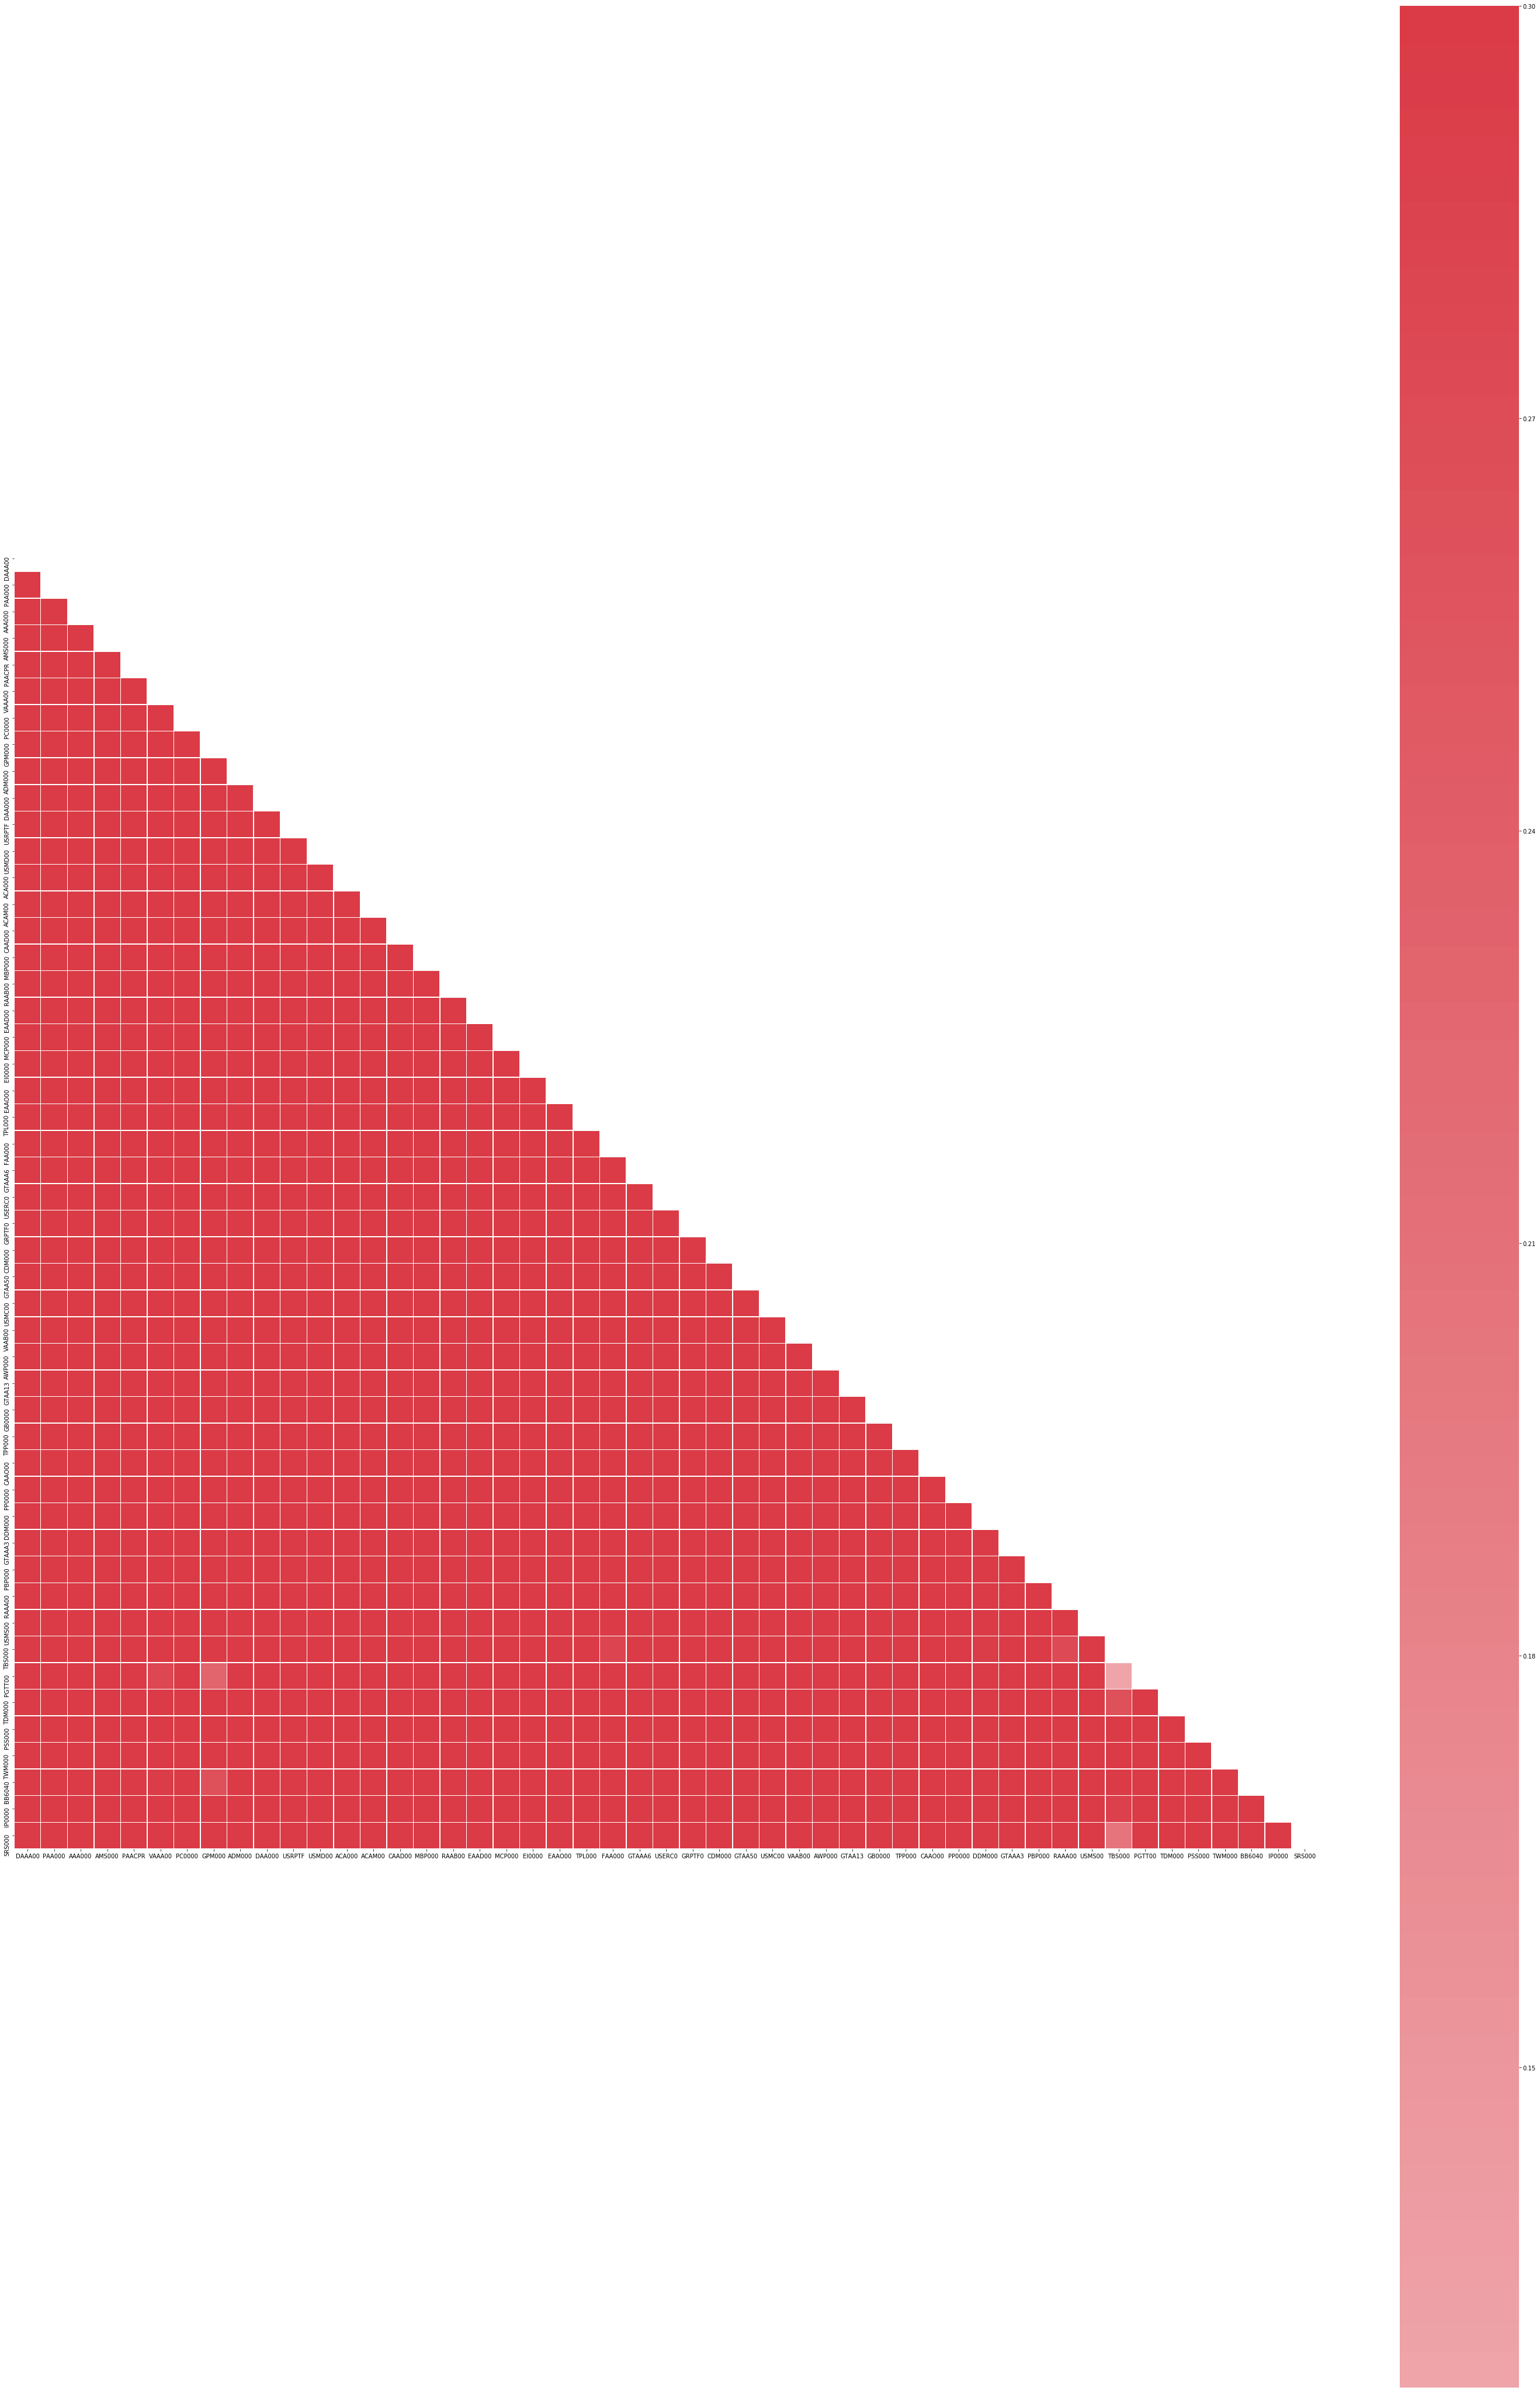

In [24]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(50, 50))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 1.5})

In [19]:
plt.figure(figsize = (20,20))
sns.heatmap(data)

TypeError: heatmap() missing 1 required positional argument: 'data'

<Figure size 1440x1440 with 0 Axes>

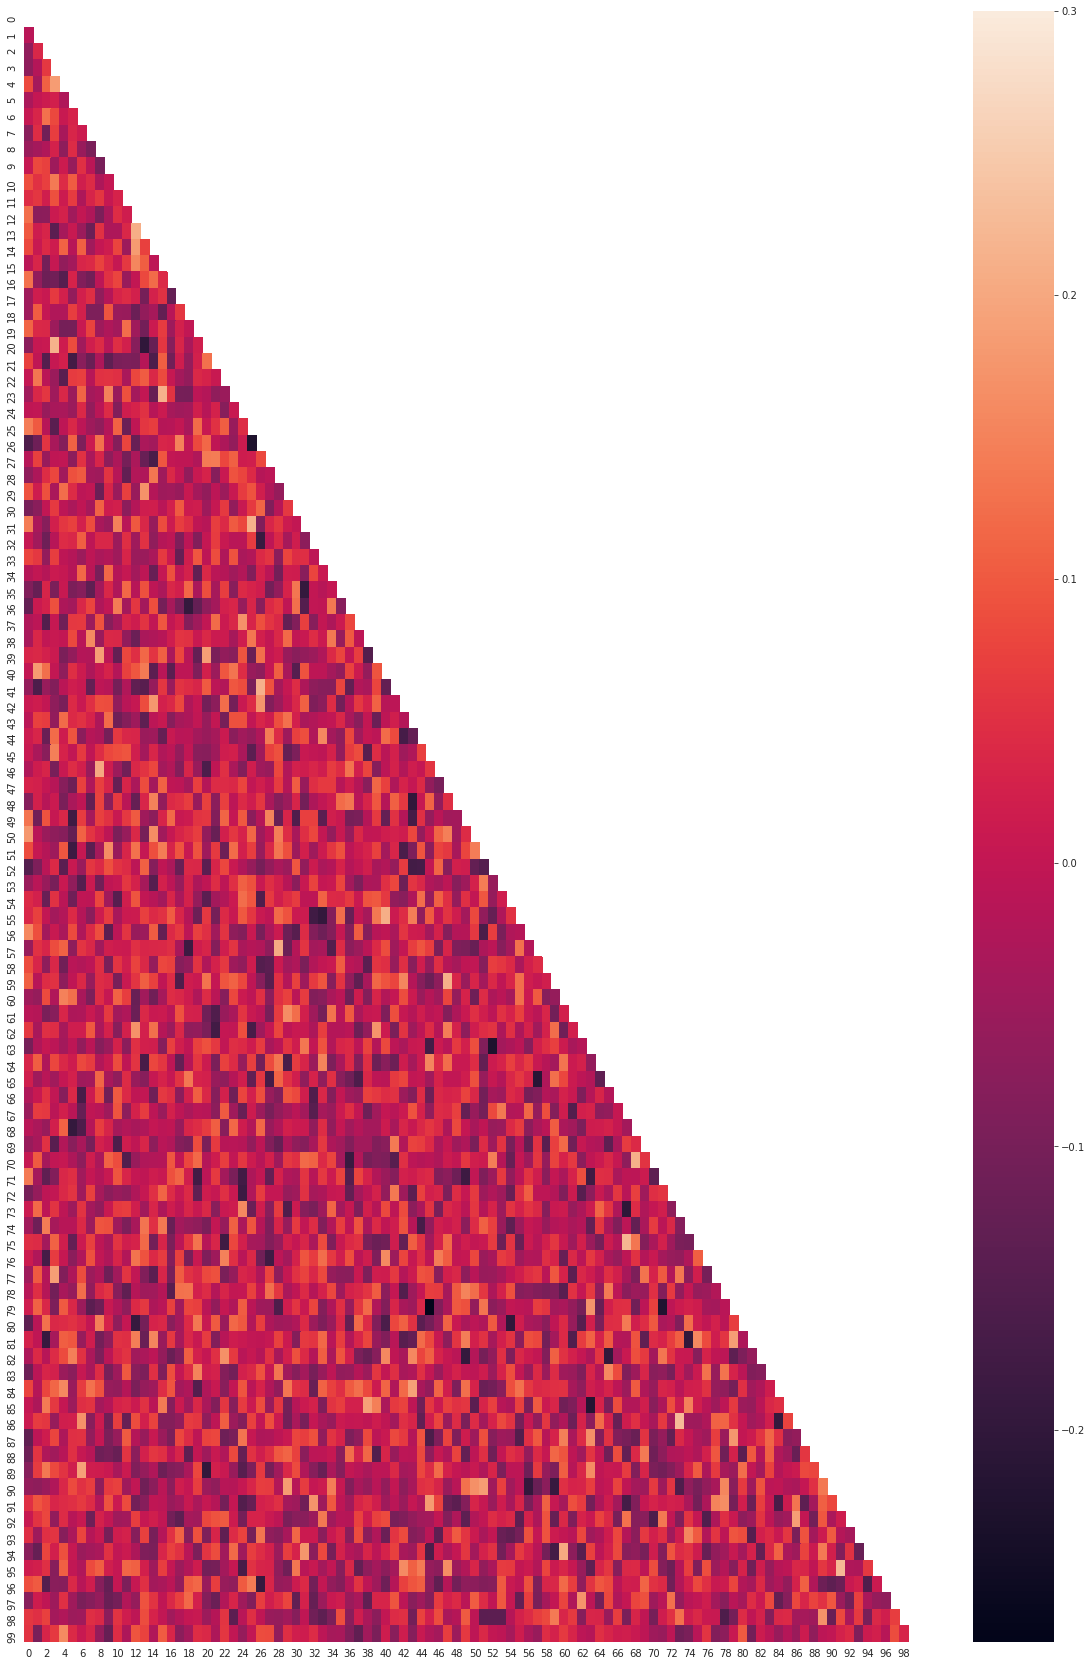

In [18]:
 >>> corr = np.corrcoef(np.random.randn(100, 200))
>>> mask = np.zeros_like(corr)
>>> mask[np.triu_indices_from(mask)] = True
>>> with sns.axes_style("white"):
    plt.figure(figsize = (20,30))
    ax = sns.heatmap(corr, mask=mask, vmax=.3)


In [12]:
corr

array([[ 1.        , -0.05928105, -0.0475459 ,  0.03535551, -0.11363451,
         0.08853413, -0.0917603 ,  0.04468699, -0.05745461, -0.14453585],
       [-0.05928105,  1.        ,  0.03571088, -0.05158398,  0.00188391,
        -0.12979316, -0.10852714, -0.10410712,  0.01129485,  0.01446984],
       [-0.0475459 ,  0.03571088,  1.        , -0.00321793, -0.0190791 ,
        -0.05145238, -0.05448044, -0.02698161, -0.05952159,  0.05178993],
       [ 0.03535551, -0.05158398, -0.00321793,  1.        , -0.01735571,
         0.00559091, -0.01930955,  0.00353712,  0.00948154,  0.00894613],
       [-0.11363451,  0.00188391, -0.0190791 , -0.01735571,  1.        ,
        -0.05308466,  0.08058163,  0.02705921,  0.01076304,  0.01242172],
       [ 0.08853413, -0.12979316, -0.05145238,  0.00559091, -0.05308466,
         1.        , -0.03857431, -0.01137102,  0.06625588,  0.10538694],
       [-0.0917603 , -0.10852714, -0.05448044, -0.01930955,  0.08058163,
        -0.03857431,  1.        , -0.16518169

# SCRATCH

In [164]:
import fintools as ft

In [ ]:
# for PAA000.csv
data_path = '/home/scubamut/MEGAsync/WORK_IN_PROGRESS/pvautomate/Data/benchmark_returns/'

In [155]:
PAA000 = d = pd.read_csv(data_path + 'PAA000.csv',index_col='Period')
d[:3]

,Return
Period,
1973-01-31,1.2%
1973-02-28,3.9%
1973-03-31,0.6%


In [159]:
rets = d.applymap(lambda x: x.rstrip('%')).astype(float)
rets

,Return
Period,
1973-01-31,1.2
1973-02-28,3.9
1973-03-31,0.6
1973-04-30,0.0
1973-05-31,0.2
1973-06-30,1.0
1973-07-31,-2.8
1973-08-31,1.9
1973-09-30,3.0


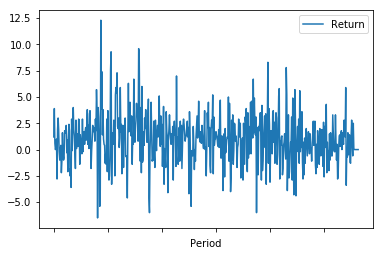

In [160]:
rets.plot()

In [161]:
rets.std()

Return    2.382305
dtype: float64

In [162]:
rets.max()

Return    12.3
dtype: float64

In [163]:
rets.min()

Return   -6.5
dtype: float64

In [165]:
ft.compute_annual_factor

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [166]:
import empyrical as e

In [167]:
import numpy as np
from empyrical import max_drawdown, alpha_beta

returns = np.array([.01, .02, .03, -.4, -.06, -.02])
benchmark_returns = np.array([.02, .02, .03, -.35, -.05, -.01])

# calculate the max drawdown
max_drawdown(returns)

# calculate alpha and beta
alpha, beta = alpha_beta(returns, benchmark_returns)

In [168]:
max_drawdown(returns)

-0.4472800000000001